# DMQC Report: WMO 4901139

## Current status and metadata: 

- APEX float in Scotian Shelf/Gulf of Maine area
- Performed 129 cycles from April 2010 to October 2013
- Currently in 'A' mode, gain not consistent
- SCIENTIFIC_CALIB_COMMENT states: 'by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 23 T-dependent slope on PPOX_DOXY with linear time trend in slope; Using in-air obs; No time response correction done; error gives 1 sigma'
- Gains start at 1.112165, end at 1.100917
- Mean gain of 1.11785 using WOA data

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.dates import datestr2num
import matplotlib.pyplot as plt

from pathlib import Path
import numpy as np
import pandas as pd
import bgcArgoDMQC as bgc

wmo = 4901139 # insert WMO number here
fig_path = Path('../../../figures/') / f'{wmo}' # where to save figures
fig_path.mkdir(exist_ok=True)
bgc.io.get_argo(wmo, local_path=bgc.io.Path.ARGO_PATH) # download the data to ensure you have up to date files
flt = bgc.sprof(wmo)
flt.clean()
gains = flt.calc_gains(ref='WOA') # calculate gain, can change to ref='NCEP' if in-air data is available
print(np.nanmean(gains))

\Users\GordonC\Documents\data\Argo\dac\meds\4901139\4901139_Rtraj.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\4901139_Sprof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\4901139_meta.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\4901139_prof.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\4901139_tech.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_001.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_002.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_003.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_004.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_005.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_006.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_007.nc
\Users\GordonC\Documents\data\Argo\dac\meds\4901139\profiles\BD4901139_008.nc
\Users\GordonC\Documents\data\Argo

## DOXY Audit Status

- If the float has any profiles present in the DOXY audit, which are they are why?
- Likely will usually be left empty/deleted

In [2]:
audit_file = list(Path('../../../audit/').glob('DOXY_WOA*'))[-1]
df = pd.read_csv(audit_file, sep='\t', header=25)
df = df.loc[df.WMO == wmo]
df['date'] = [datestr2num(t) for t in df['profile date']]
print(df)

     DAC             PI SPROF DATE_UPDATE DATA MODE      WMO  cycle  \
10  meds  Blair Greenan    06/28/22 19:31         A  4901139     13   

      profile date    lon    lat  WOA T  ...  PRES   TEMP  PSAL  flt O2 %sat  \
10  08/18/10 20:27 -57.84  44.03  18.42  ...   6.8  20.37  31.5       110.64   

    flt O2adj %sat  WOA G_raw  WOA G_adj  Z_WOAraw  Z_WOAadj          date  
10          124.37       0.96       0.85       2.6       6.2  14839.852083  

[1 rows x 22 columns]


## Visual QC

- Visualize the float and reference surface saturations, as well as the profiles. 
- Observe if DOXY data is set to '3' as it should be or if it is '1' or '2'. 
- Try to note cycles or other identifying features of potentially problematic profiles.

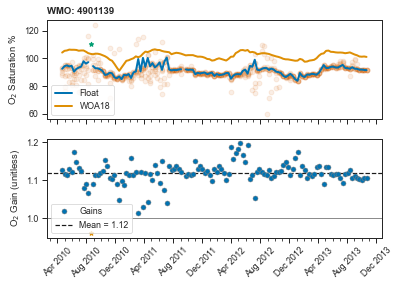

In [3]:
g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_initial.png', bbox_inches='tight', dpi=250)

Figure 1: Top panel: Float oxygen percent saturation (blue line) compared to WOA percent saturation (orange line), with DOXY audit flagged cycle percent saturation (green stars, if applicable) and raw float percent saturation (orange circles). Bottom panel: calculated gains (blue dots) and flagged gains from DOXY audit (orange stars).

Notes: I think it is fair to point out that this point my be erroneous. I will not recalculate the gain since it has already been applied reliably by Henry, but rather visually QC this profiles (and others) and move the float to D-mode. 

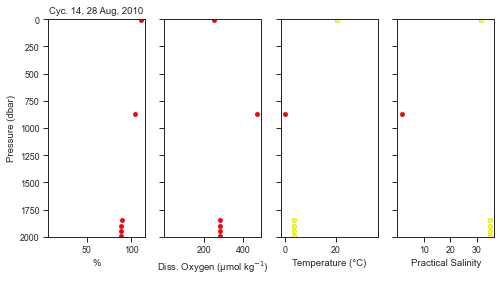

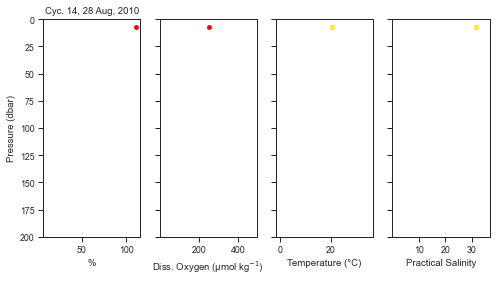

In [12]:
flt.reset()
g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'TEMP', 'PSAL'], Nprof=1, Ncycle=15)
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'TEMP', 'PSAL'], Nprof=1, Ncycle=15)
g.axes[0].set_ylim((200,0))
g.fig.savefig(fig_path / 'qcprofiles_shallow.png', bbox_inches='tight', dpi=250)

In [5]:
flt.df.loc[flt.df.CYCLE==13][['PRES','DOXY']]

,PRES,DOXY
864,6.800000,253.688278
865,873.500000,470.941406
866,1850.199951,284.154755
867,1899.400024,284.153564
868,1949.500000,284.269470
869,1993.400024,283.888885
870,2065.800049,22.988806
871,2072.199951,25.448906


Figures 2,3: Profiles coloured by QC flag (1-2, green, 3, yellow, 4, red) on difference depth scales.

Notes: [notes on what this figure tells you here] 

## Flag bad data, recalculate gain

- Using the plots above (and likely some more specific plots, made on a case-by-case basis), flag bad DOXY data as 4. 
- After flagging bad data, re-clean the data and re-calculate the gains.


Calculating gains using WOA surface data and float O2 percent saturation...
1.1193169445746427


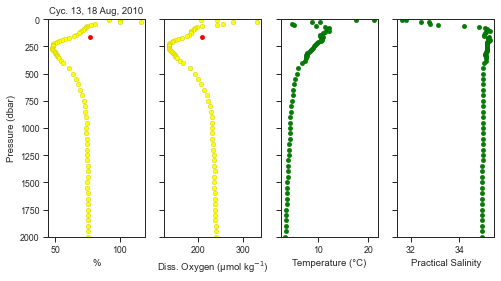

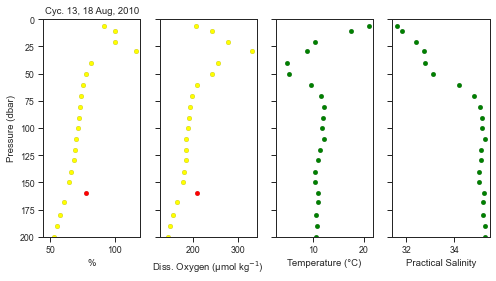

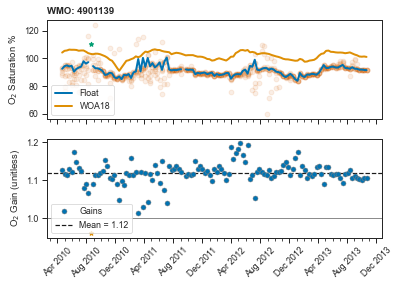

In [6]:
flt.reset()
bad_oxygen = (flt.df.CYCLE == 13) | (((flt.df.CYCLE == 12) & (flt.df.DOXY > 200)) & ((flt.df.PRES > 150) & (flt.df.PRES < 200))) # index defining where the oxygen should be flagged as bad
flt.update_field('DOXY_QC', 4, where=bad_oxygen)
flt.update_field('DOXY_ADJUSTED_QC', 4, where=bad_oxygen)

g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'TEMP', 'PSAL'], Nprof=1, Ncycle=14)
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'TEMP', 'PSAL'], Nprof=1, Ncycle=14)
g.axes[0].set_ylim((200,0))
flt.clean()
new_gains = flt.calc_gains(ref='WOA')
print(np.nanmean(new_gains))

g = flt.plot('gain', ref='WOA')
g.axes[0].set_title(f'WMO: {wmo}', loc='left', fontweight='bold')
g.axes[0].plot(df['date'], df['flt O2 %sat'], '*')
g.axes[1].plot(df['date'], df['WOA G_raw'], '*', zorder=3)
g.axes[0].plot(flt.df.SDN.loc[flt.df.PRES < 50], flt.df.O2Sat.loc[flt.df.PRES < 50], 'o', zorder=0, alpha=0.1)
g.fig.savefig(fig_path / 'gain_final.png', bbox_inches='tight', dpi=250)

Figure x: Repeated gain plot with bad data removed.

## Update Fields and Export

- DOXY should be 3 by default, but many old floats have 1 or 0. Though it will be redundant in some cases, make sure DOXY_QC is not good.
- Apply the gain to calculate DOXY_ADJUSTED. 
- Fill in DOXY_ADJUSTED_ERROR with an appropriate fixed value.
- Fill in DOXY_ADJUSTED_QC. 
- Make sure DOXY_ADJUSTED and DOXY_ADJUSTED_ERROR are `FillValue` wherever DOXY_ADJUSTED_QC is bad.
- Export the D-mode files. During export, HISTORY parameters will be filled as well as SCIENTIFIC_CALIB parameters using some default structures and user info set by calling `bgc.configure.configure()`.

(97.72386322021484, 372.24210968017576)

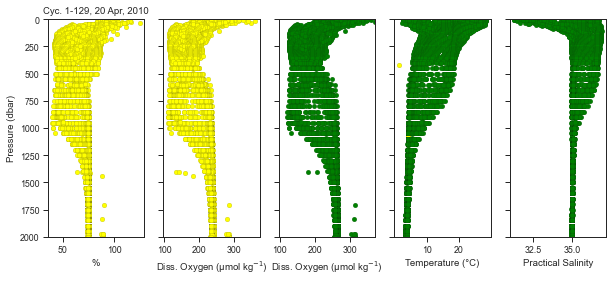

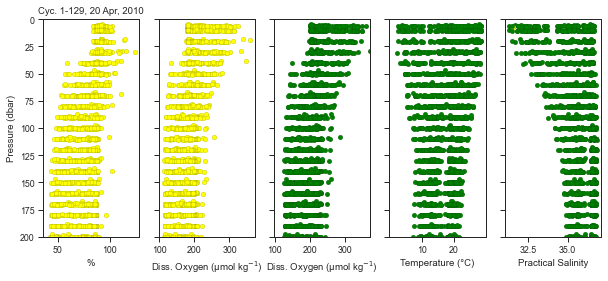

In [7]:
# make sure DOXY_QC is 3 instead of 0,1,2
flt.update_field('DOXY_QC', 3, where=flt.DOXY_QC.isin([0, 1, 2]))
# fill in DOXY_ADJUSTED_QC appropriately
# flt.update_field('DOXY_ADJUSTED_QC', flt.DOXY_QC)
# flt.update_field('DOXY_ADJUSTED_QC', 1, where=flt.DOXY_ADJUSTED_QC.isin([0, 3]))
# flt.update_field('DOXY_ADJUSTED_QC', 3, where=flt.PSAL_ADJUSTED_QC == 4)
# flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.TEMP_ADJUSTED_QC == 4)
# flt.update_field('DOXY_ADJUSTED_QC', 4, where=flt.DOXY_ADJUSTED.isna())
# make sure the data is FillValues where adjusted values are still bad
flt.set_fillvalue('DOXY_ADJUSTED', where=flt.DOXY_ADJUSTED_QC == 4)
flt.set_fillvalue('DOXY_ADJUSTED_ERROR', where=flt.DOXY_ADJUSTED_QC == 4)

flt.clean()
g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'DOXY_ADJUSTED', 'TEMP', 'PSAL'])
g.axes[2].set_xlim(g.axes[1].get_xlim())
g.fig.savefig(fig_path / 'qcprofiles.png', bbox_inches='tight', dpi=250)
g = flt.plot('qcprofiles', varlist=['O2Sat', 'DOXY', 'DOXY_ADJUSTED', 'TEMP', 'PSAL'])
g.axes[0].set_ylim((200,0))
g.axes[2].set_xlim(g.axes[1].get_xlim())

In [8]:
# export the files
comment = 'by Henry Bittig; ORCID 0000-0002-8621-3095; after Bittig et al. (2018) eq. 23 T-dependent slope on PPOX_DOXY with linear time trend in slope; Using in-air obs; No time response correction done; error gives 1 sigma'
comment += f"; Visual QC by Christopher Gordon (DFO, ORCID {bgc.config['orcid']})"
comment = comment.replace('No time response correction done;', '')
flt.export_files(data_mode='D', comment=comment, coeff='previous', equation='previous')

Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_001.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_002.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_003.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_004.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_005.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_006.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_007.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_008.nc...done
Working on D-mode file /Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles/BD4901139_009.nc...done
Working on

In [9]:
import sys
import copy
from netCDF4 import Dataset

for fn in ['BD4901139_013.nc', 'BD4901139_052.nc']:
    full_fn = Path('/Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles') / fn
    sys.stdout.write(f'Working on {full_fn}...')
    nc = Dataset(full_fn, 'r+')
    for varname in ['DOXY', 'TEMP_DOXY']:
        flags = copy.deepcopy(nc[varname+'_QC'][:])
        flags[nc[varname][:].mask] = b'9'
        nc[varname+'_QC'][:] = flags
        if varname == 'DOXY':
            flags = copy.deepcopy(nc[varname+'_ADJUSTED_QC'][:])
            flags[nc[varname][:].mask] = b'9'
            nc[varname+'_ADJUSTED_QC'][:] = flags
    if fn == 'BD4901139_052.nc':
        profile = copy.deepcopy(nc['PROFILE_DOXY_QC'][:])
        profile[0] = b'B'
        nc['PROFILE_DOXY_QC'][:] = profile

    nc.close()
    sys.stdout.write('done\n')


Working on \Users\GordonC\Documents\data\Argo\dac\meds\D\4901139\profiles\BD4901139_013.nc...done
Working on \Users\GordonC\Documents\data\Argo\dac\meds\D\4901139\profiles\BD4901139_052.nc...done


In [10]:
fn = Path('/Users/GordonC/Documents/data/Argo/dac/meds/D/4901139/profiles') / 'BD4901139_052.nc'
nc = Dataset(fn)
nc['PROFILE_DOXY_QC'][:]

masked_array(data=[b'B'],
             mask=False,
       fill_value=b'N/A',
            dtype='|S1')

In [11]:
nc.close()